# Trabajo Práctico 7 - Grupo 2
## Matías Bergerman, Pablo González Leiro, Tobias Demeco, Matías Tripoli

In [2]:
# Import libraries
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [22]:
def display_np(x, scale = 1.0, resampling = Image.Resampling.BICUBIC):
    im = Image.fromarray(x.clip(0, 255).astype(np.uint8))
    display(im.resize((np.array(im.size)*scale).astype(int), resampling))

def display_np_row(x, scale = 1.0, resampling = Image.Resampling.BICUBIC, spacer_width = 0, spacer_grayscale = 0):
    img = np.array(x, dtype=np.uint8)
    if len(img.shape) <= 3:
        spacer = np.ones((img[0].shape[0], spacer_width), dtype=np.uint8) * spacer_grayscale
    else:
        spacer = np.ones((img[0].shape[0], spacer_width, img[0].shape[2]), dtype=np.uint8) * spacer_grayscale
        
    img_combined = img[0]
    for i in range(1, len(img)):
        img_combined = np.concatenate((img_combined, spacer, img[i]), axis=1)
    display_np(img_combined, scale, resampling)

## Ejercicio 1

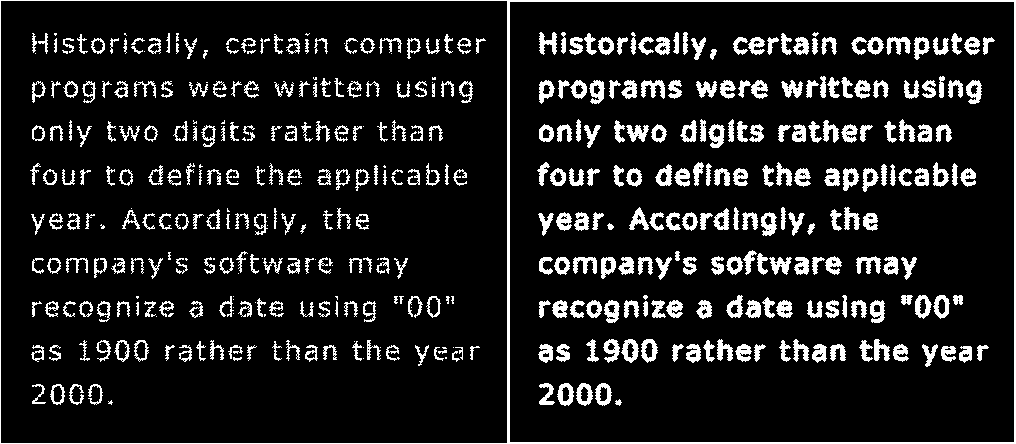

In [31]:
img = cv2.imread('images/Broken_Text.tif', cv2.IMREAD_GRAYSCALE)

kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)
img_dilated  = cv2.dilate(img, kernel)

display_np_row([img, img_dilated])

## Ejercicio 2

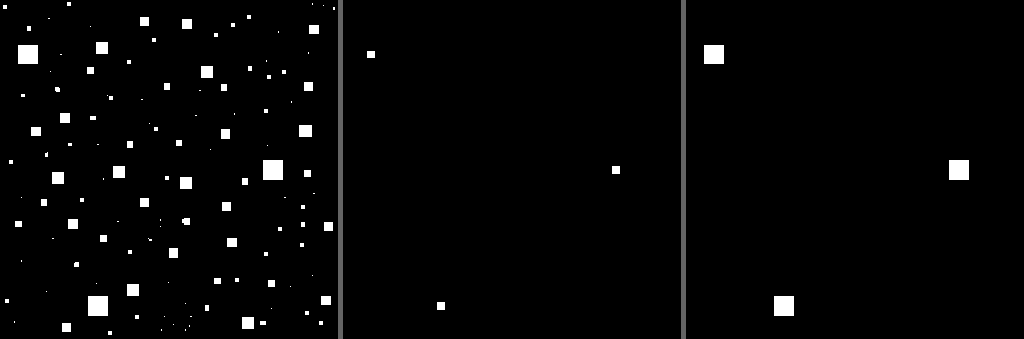

In [35]:
img = cv2.imread('images/Noisy_Squares.tif', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((13, 13), dtype=np.uint8)
img_eroded  = cv2.erode(img, kernel)
img_dilated  = cv2.dilate(img_eroded, kernel)

display_np_row([img, img_eroded, img_dilated], spacer_width=5, spacer_grayscale=100)

## Ejercicio 3

Kernel de apertura:


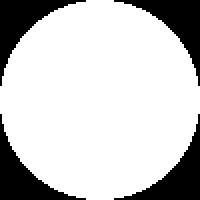

Resultado de apertura:


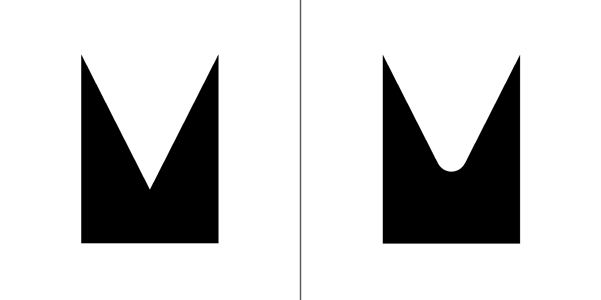

Resultado de apertura al invertir la imagen:


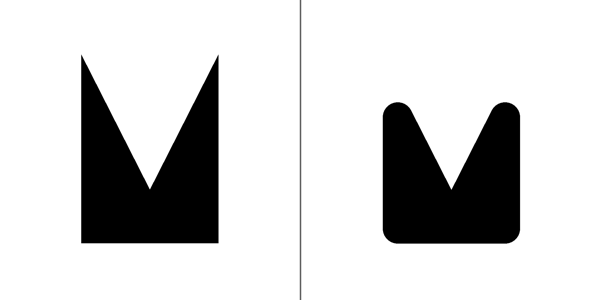

In [75]:
img = cv2.imread('images/ex3.png', cv2.IMREAD_GRAYSCALE)

KERNEL_RADIUS = 50

inside_circle = lambda x, y: (x+0.5-KERNEL_RADIUS)**2+(y+0.5-KERNEL_RADIUS)**2 < (KERNEL_RADIUS)**2
kernel = [[1 if inside_circle(x, y) else 0 for x in range(KERNEL_RADIUS*2)] for y in range(KERNEL_RADIUS*2)]

kernel = np.array(kernel, dtype=np.uint8)
print('Kernel de apertura:')
display_np(kernel*255, scale=100/KERNEL_RADIUS, resampling=Image.Resampling.NEAREST)

img_eroded  = cv2.erode(img, kernel)
img_dilated  = cv2.dilate(img_eroded, kernel)

print('Resultado de apertura:')
display_np_row([img, img_dilated], scale=0.3, spacer_width=5, spacer_grayscale=100)

img_eroded  = cv2.erode(cv2.bitwise_not(img), kernel)
img_dilated  = cv2.bitwise_not(cv2.dilate(img_eroded, kernel))

print('Resultado de apertura al invertir la imagen:')
display_np_row([img, img_dilated], scale=0.3, spacer_width=5, spacer_grayscale=100)

## Ejercicio 4

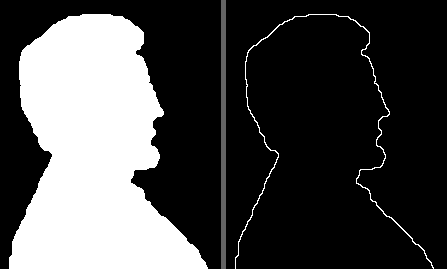

In [83]:
img = cv2.imread('images/Lincoln from penny.tif', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3, 3), dtype=np.uint8)
img_eroded  = cv2.erode(img, kernel)
img_contour = img-img_eroded

display_np_row([img, img_contour], spacer_width=5, spacer_grayscale=100)

## Ejercicio 5